In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
import missingno as msno

from utils.plot_stromerzeugung import (plot_solar_generation_by_date, 
                                       plot_solar_generation_over_time, 
                                       plot_solar_generation_seasonal_heatmap)
from utils.finde_zusammenhang import(merge_energy_and_forecast,
                                     plot_attribute_vs_label_filtered)

df1 = pd.read_parquet('../Daten/forecasts.parquet')

df2 = pd.read_parquet('../Daten/energy_test1.parquet')

df3 = pd.read_parquet('../Daten/energy_test2.parquet')

df4 = pd.read_parquet('../Daten/energy_train.parquet')

df4.head(24)

ImportError: cannot import name 'plot_attribute_vs_label' from 'utils.finde_zusammenhang' (/home/datata1/Documents/ml1-project/Analyse_Training/utils/finde_zusammenhang.py)

# Aufgabe 1.1

In [2]:
# Anzahl der Datenpunkte im Datensatz
total_data_points_energy_train = len(df4)
total_data_points_energy_test1 = len(df2)
total_data_points_energy_test2 = len (df3)

# Anzahl der fehlenden Zielwerte (falls NaN verwendet wird)
missing_values = df4['Solar_MWh'].isna().sum()

# Falls '0.0' Zielwerte bedeutet, zählen Sie diese
zero_values = (df4['Solar_MWh'] == 0.0).sum()

print("="*40)
print("💡 Aufgabe 1.1 💡")
print("="*40)
print(f"🔹 Gesamte Datenpunkte im Trainingsdatensatz: {total_data_points_energy_train}")
print(f"🔹 Gesamte Datenpunkte im Testdatensatz 1:   {total_data_points_energy_test1}")
print(f"🔹 Gesamte Datenpunkte im Testdatensatz 2:   {total_data_points_energy_test2}")
print("-"*40)
print(f"❓ Fehlende Werte in Solar_MWh (Train): {missing_values:,}")
print(f"⭕ Zielwerte (Solar_MWh = 0.0) (Train): {zero_values:,}")
print("="*40)



💡 Aufgabe 1.1 💡
🔹 Gesamte Datenpunkte im Trainingsdatensatz: 19968
🔹 Gesamte Datenpunkte im Testdatensatz 1:   7245
🔹 Gesamte Datenpunkte im Testdatensatz 2:   7465
----------------------------------------
❓ Fehlende Werte in Solar_MWh (Train): 4
⭕ Zielwerte (Solar_MWh = 0.0) (Train): 9,344


# Aufgabe 1.2

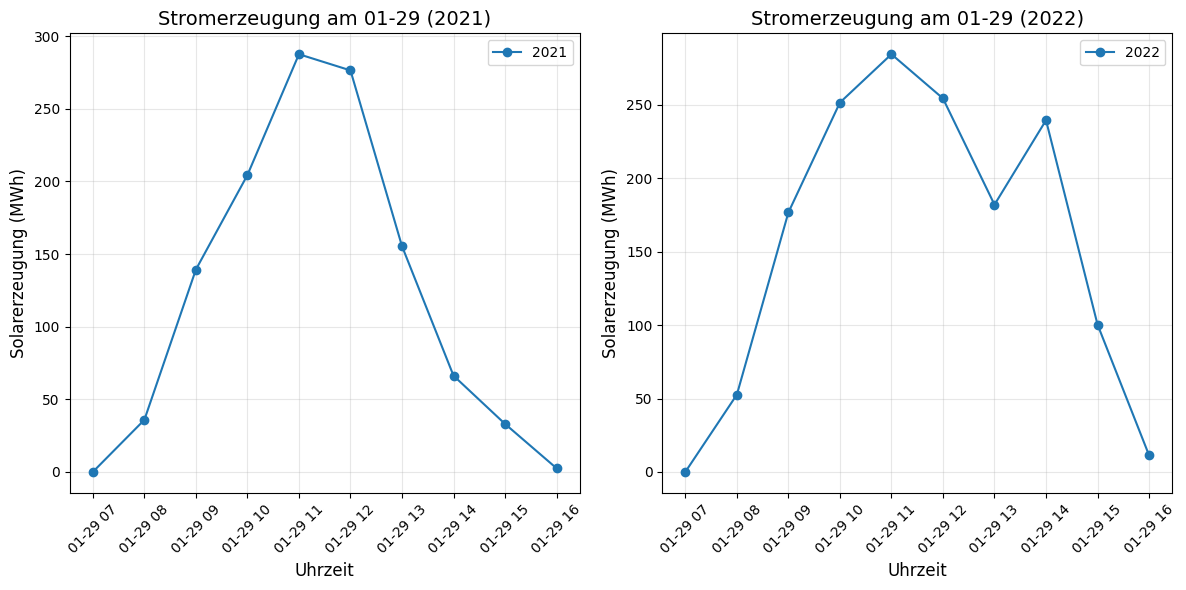

In [3]:
plot_solar_generation_by_date(df4, '01-29')

# Aufgabe 1.3

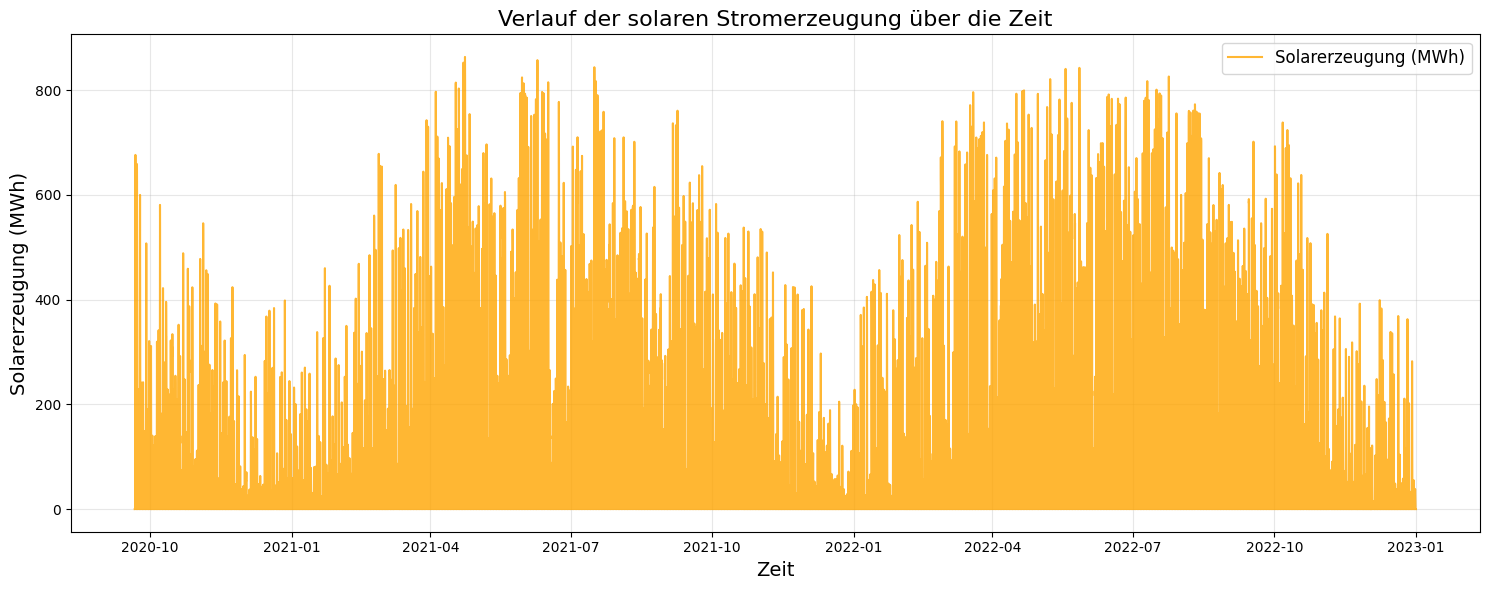

In [4]:
plot_solar_generation_over_time(df4)

/home/datata1/Documents/ml1-project/Analyse_Training/utils/plot_stromerzeugung.py:110: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_grouped = df.pivot_table(index='Season', columns='hour', values='Solar_MWh', aggfunc='mean')


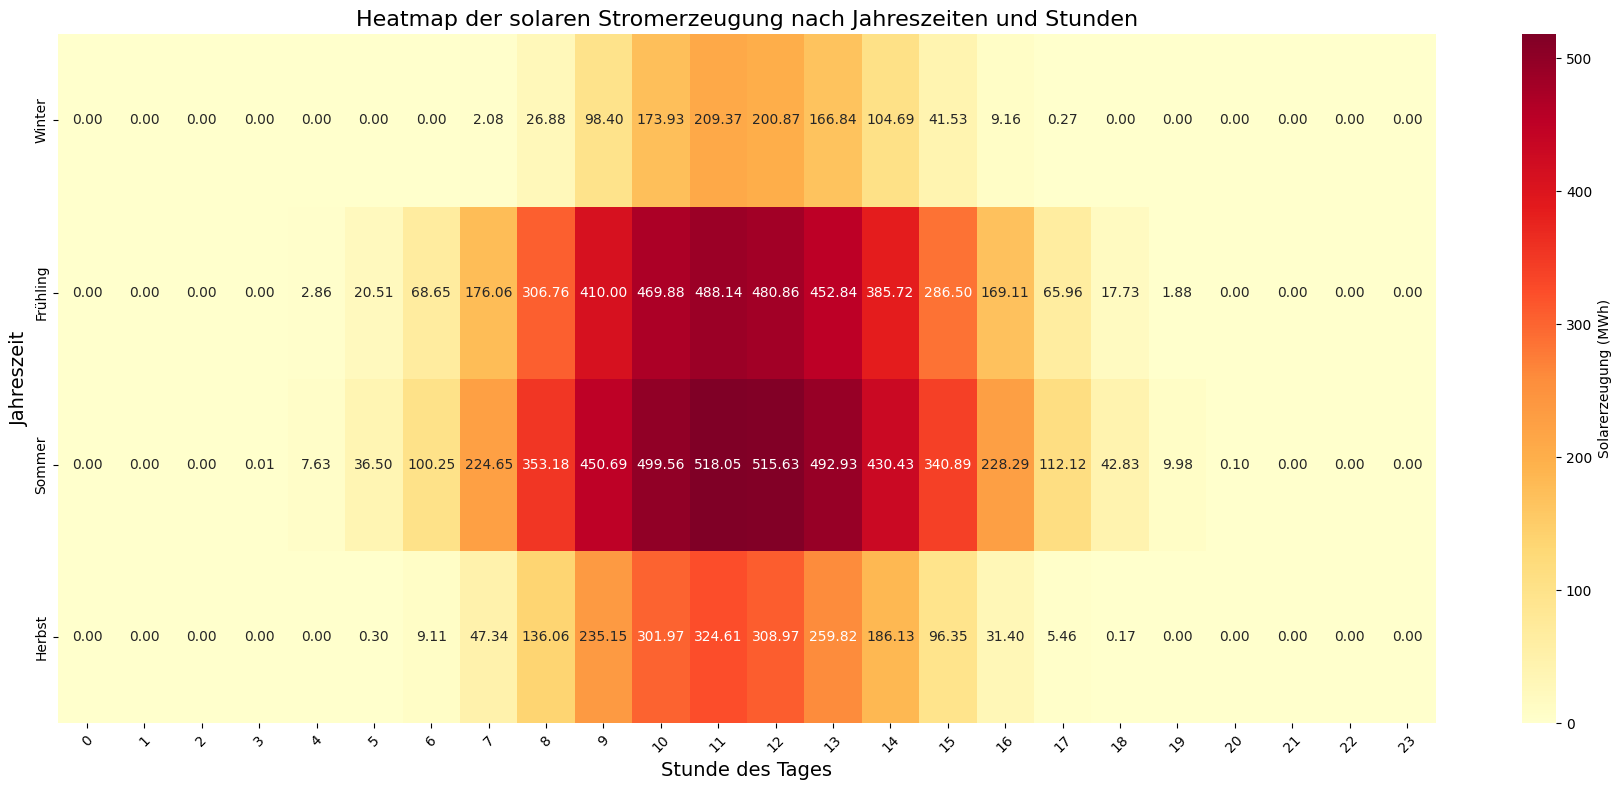

In [5]:
plot_solar_generation_seasonal_heatmap(df4)

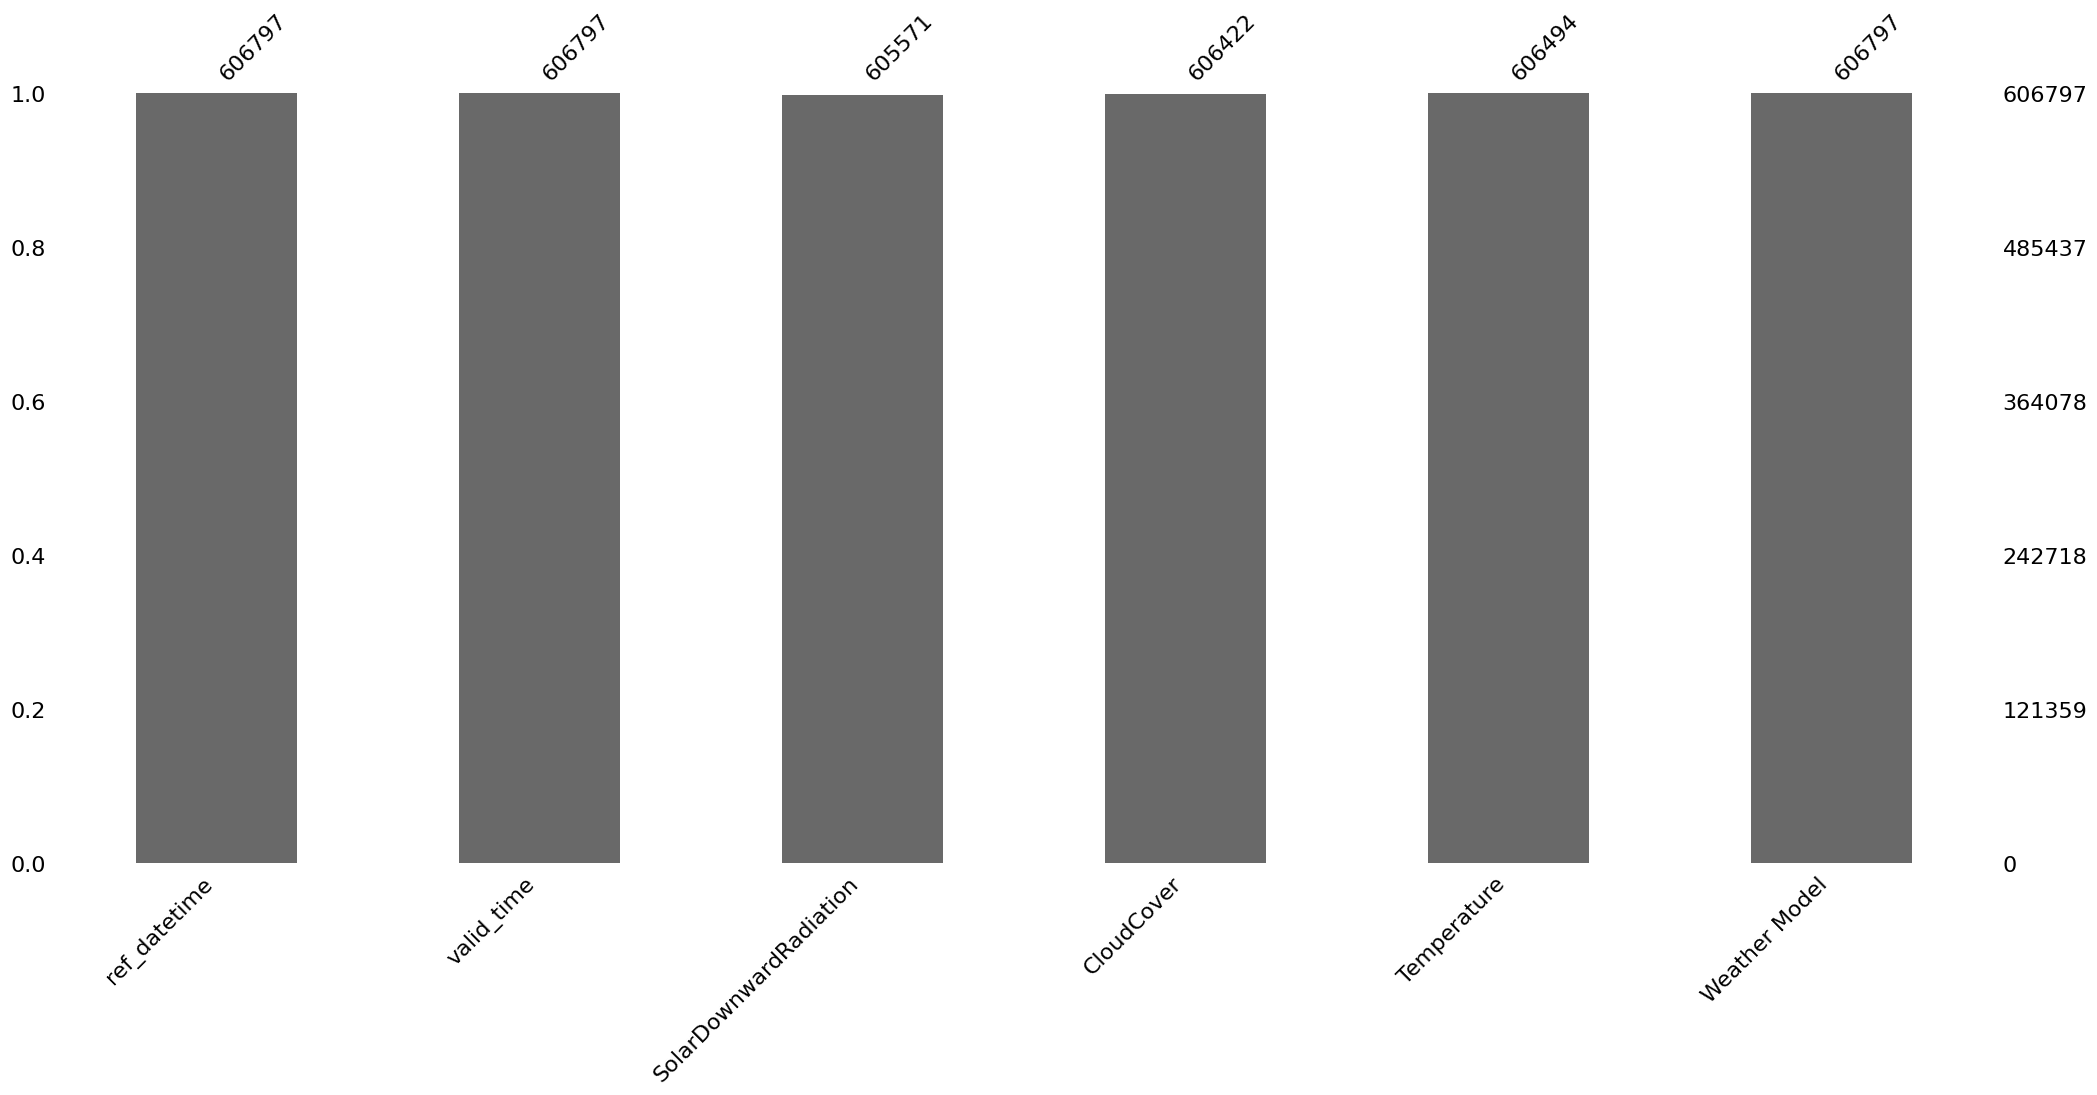

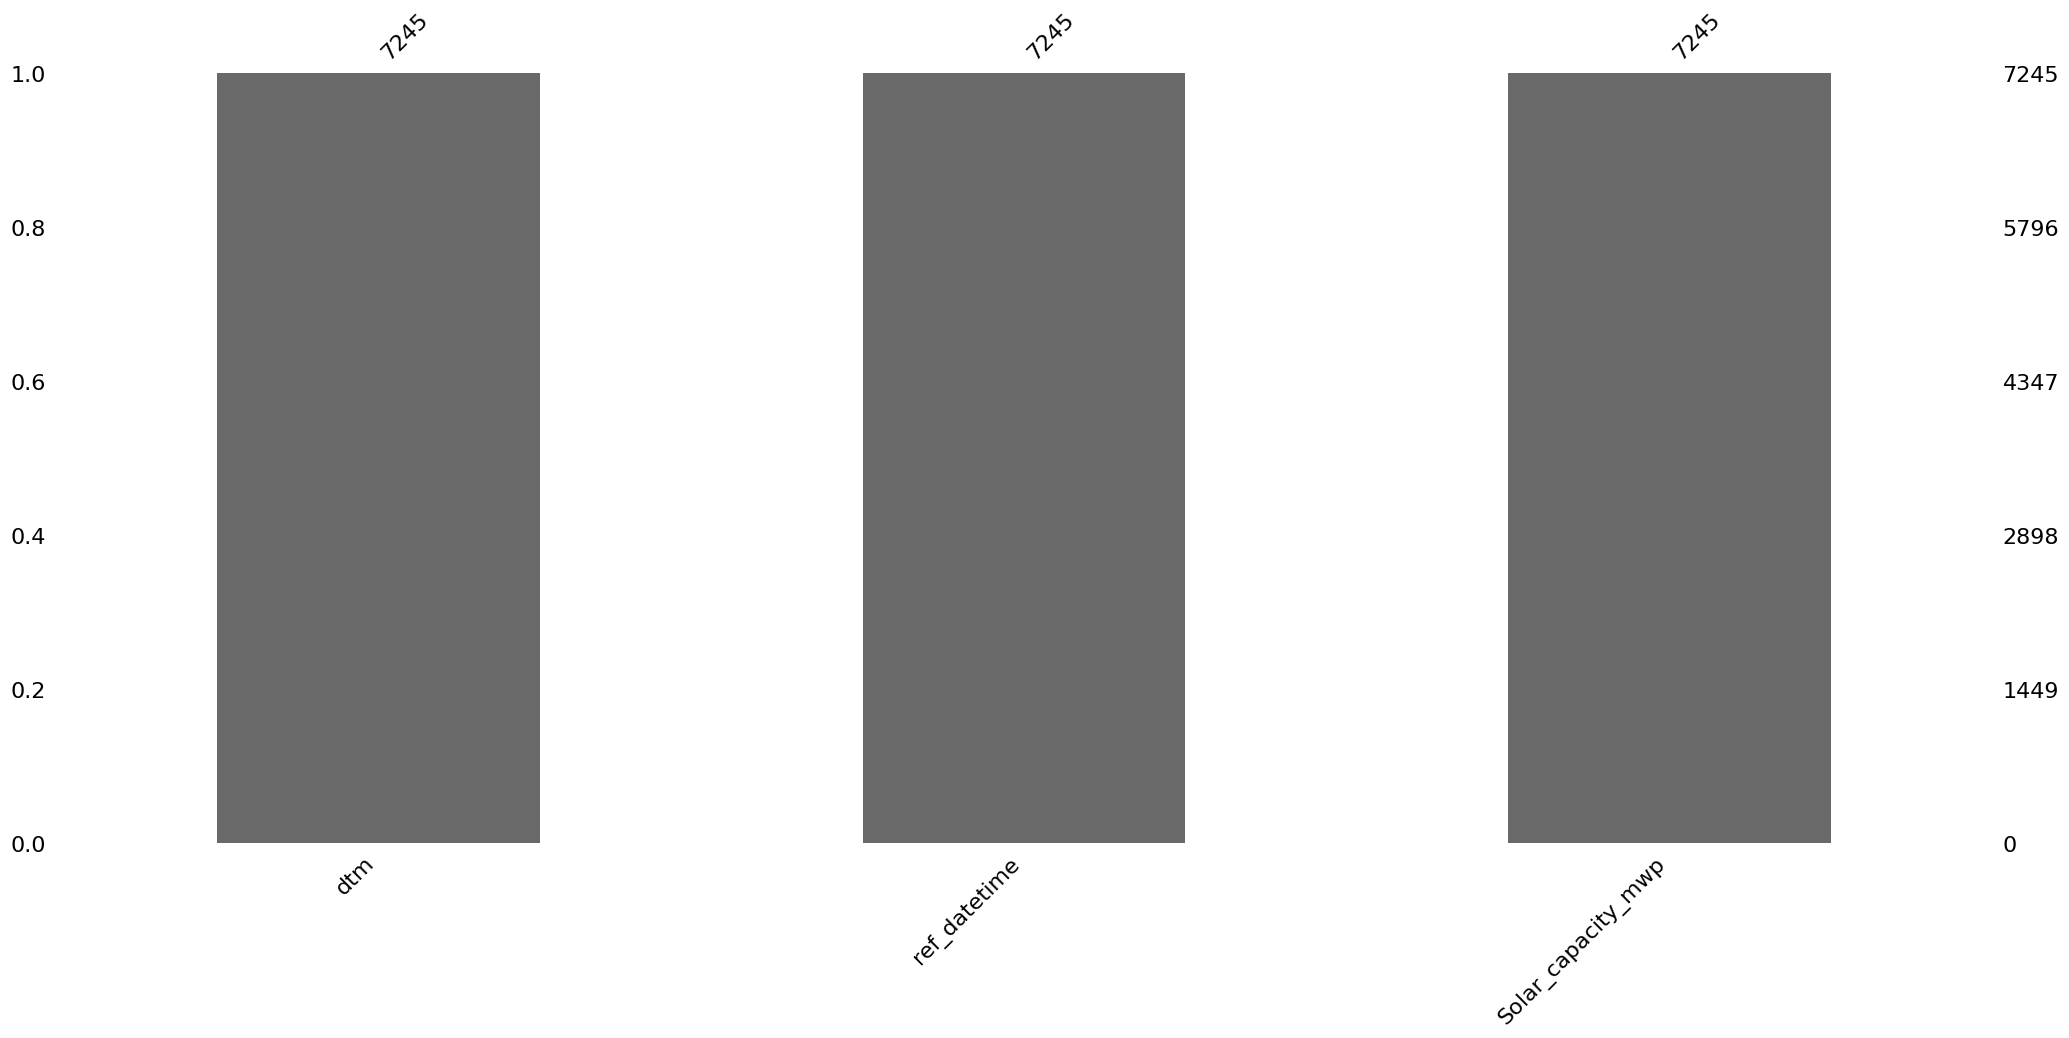

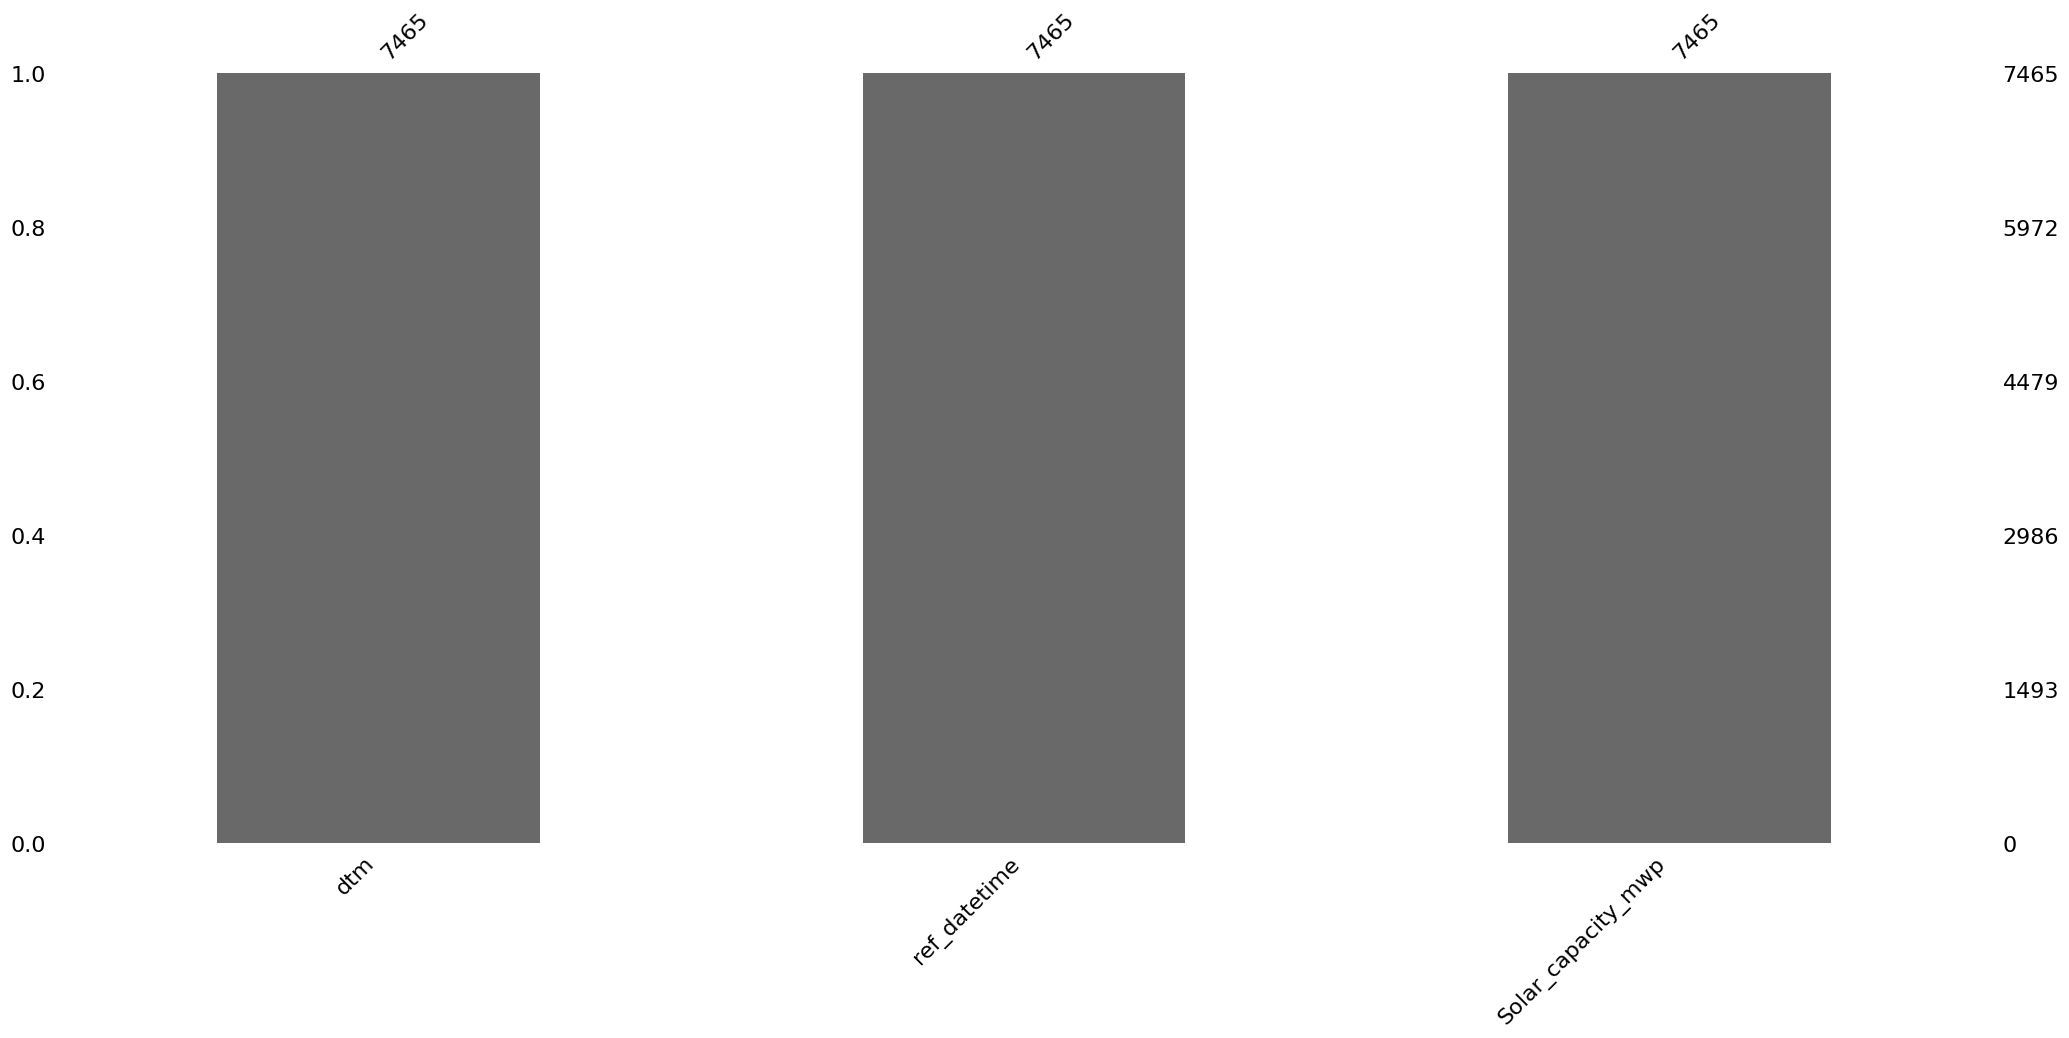

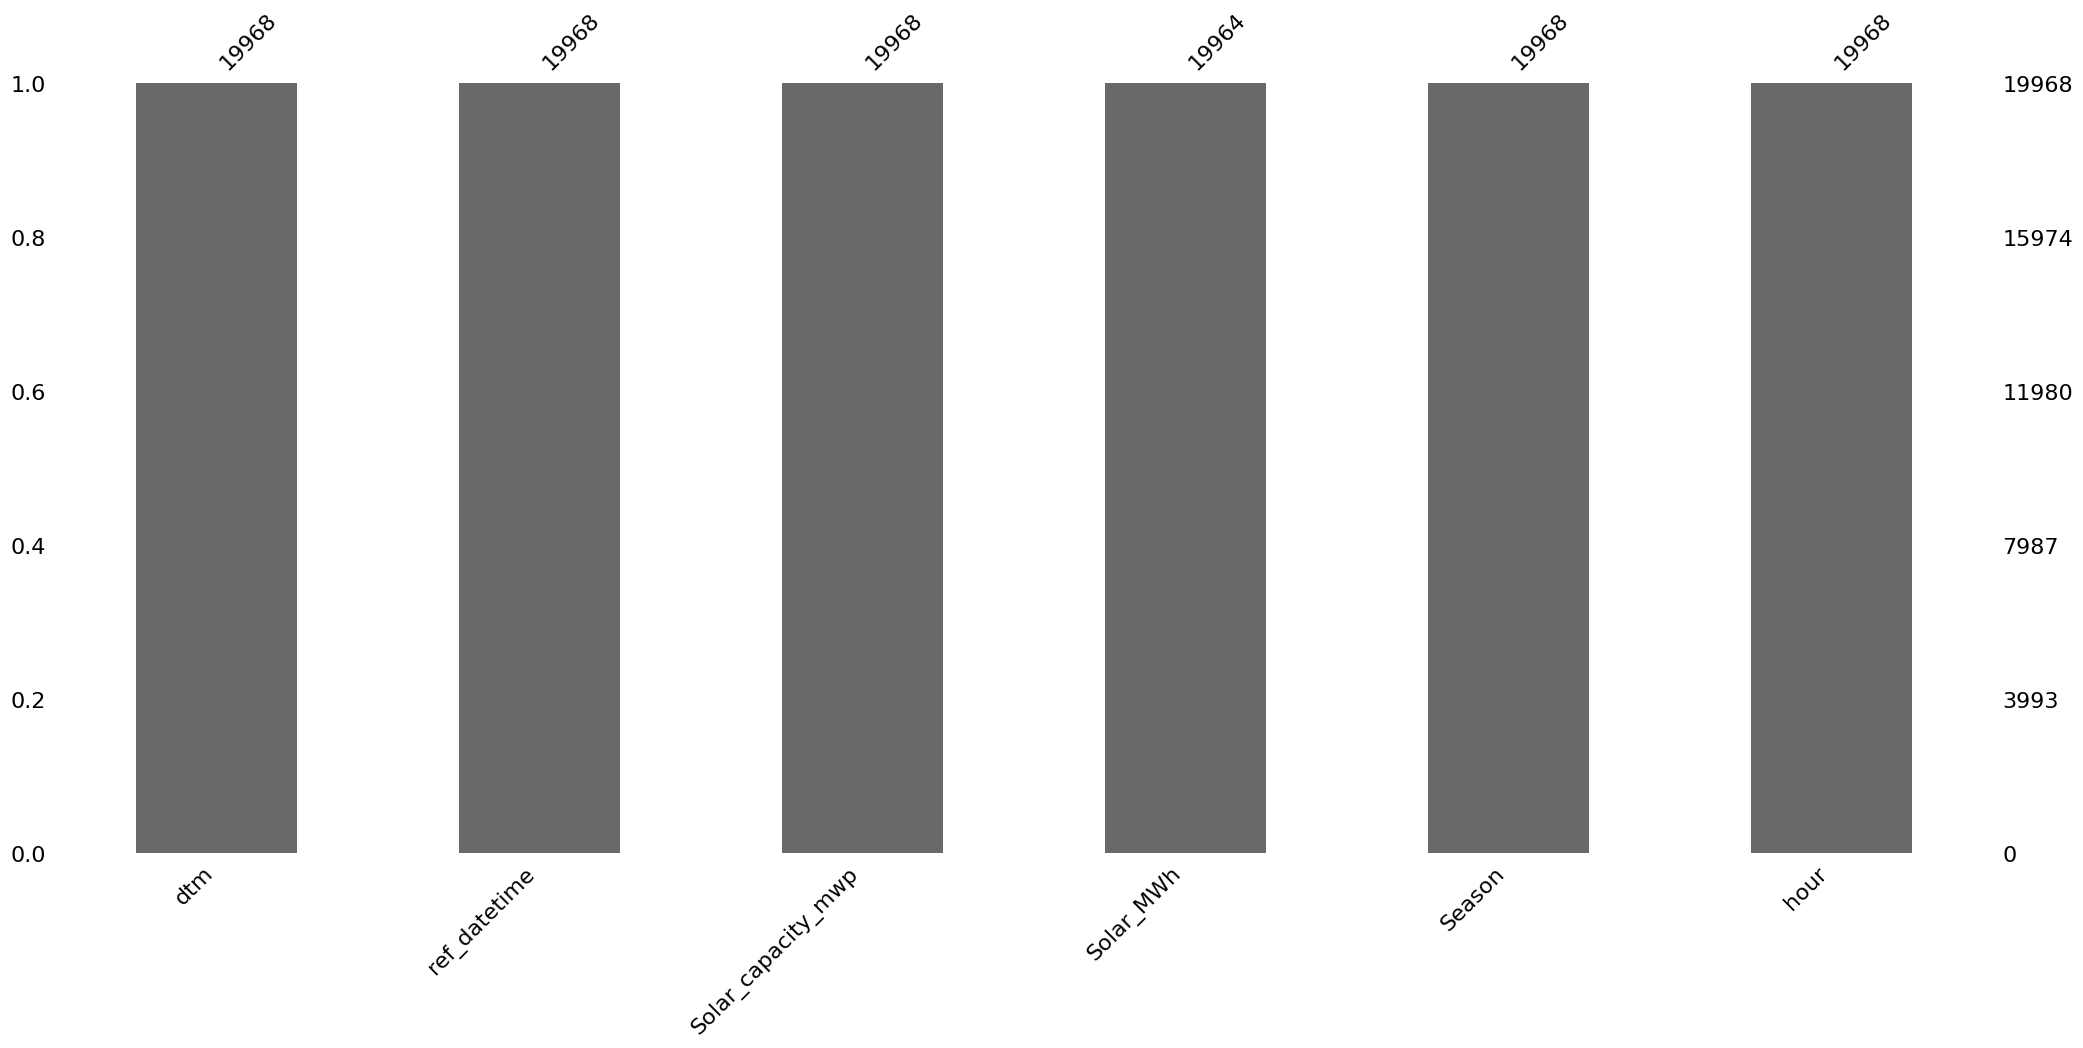

In [6]:
import missingno as msno
import matplotlib.pyplot as plt

# Ein Barplot der fehlenden Werte pro Spalte
msno.bar(df1)
plt.show()

msno.bar(df2)
plt.show()

msno.bar(df3)
plt.show()


msno.bar(df4)
plt.show()




notes: 

- probierte KNN imputer von sklearn um fehlende Werte einzusetzen (df1)
- Wenn alle drei Werte 
- bei df4 einfach den mittelwert imputen
- prüfen ob ein Wert von 0.0 in df4 richtig ist, oder auch wie null werte behandelt werden kann

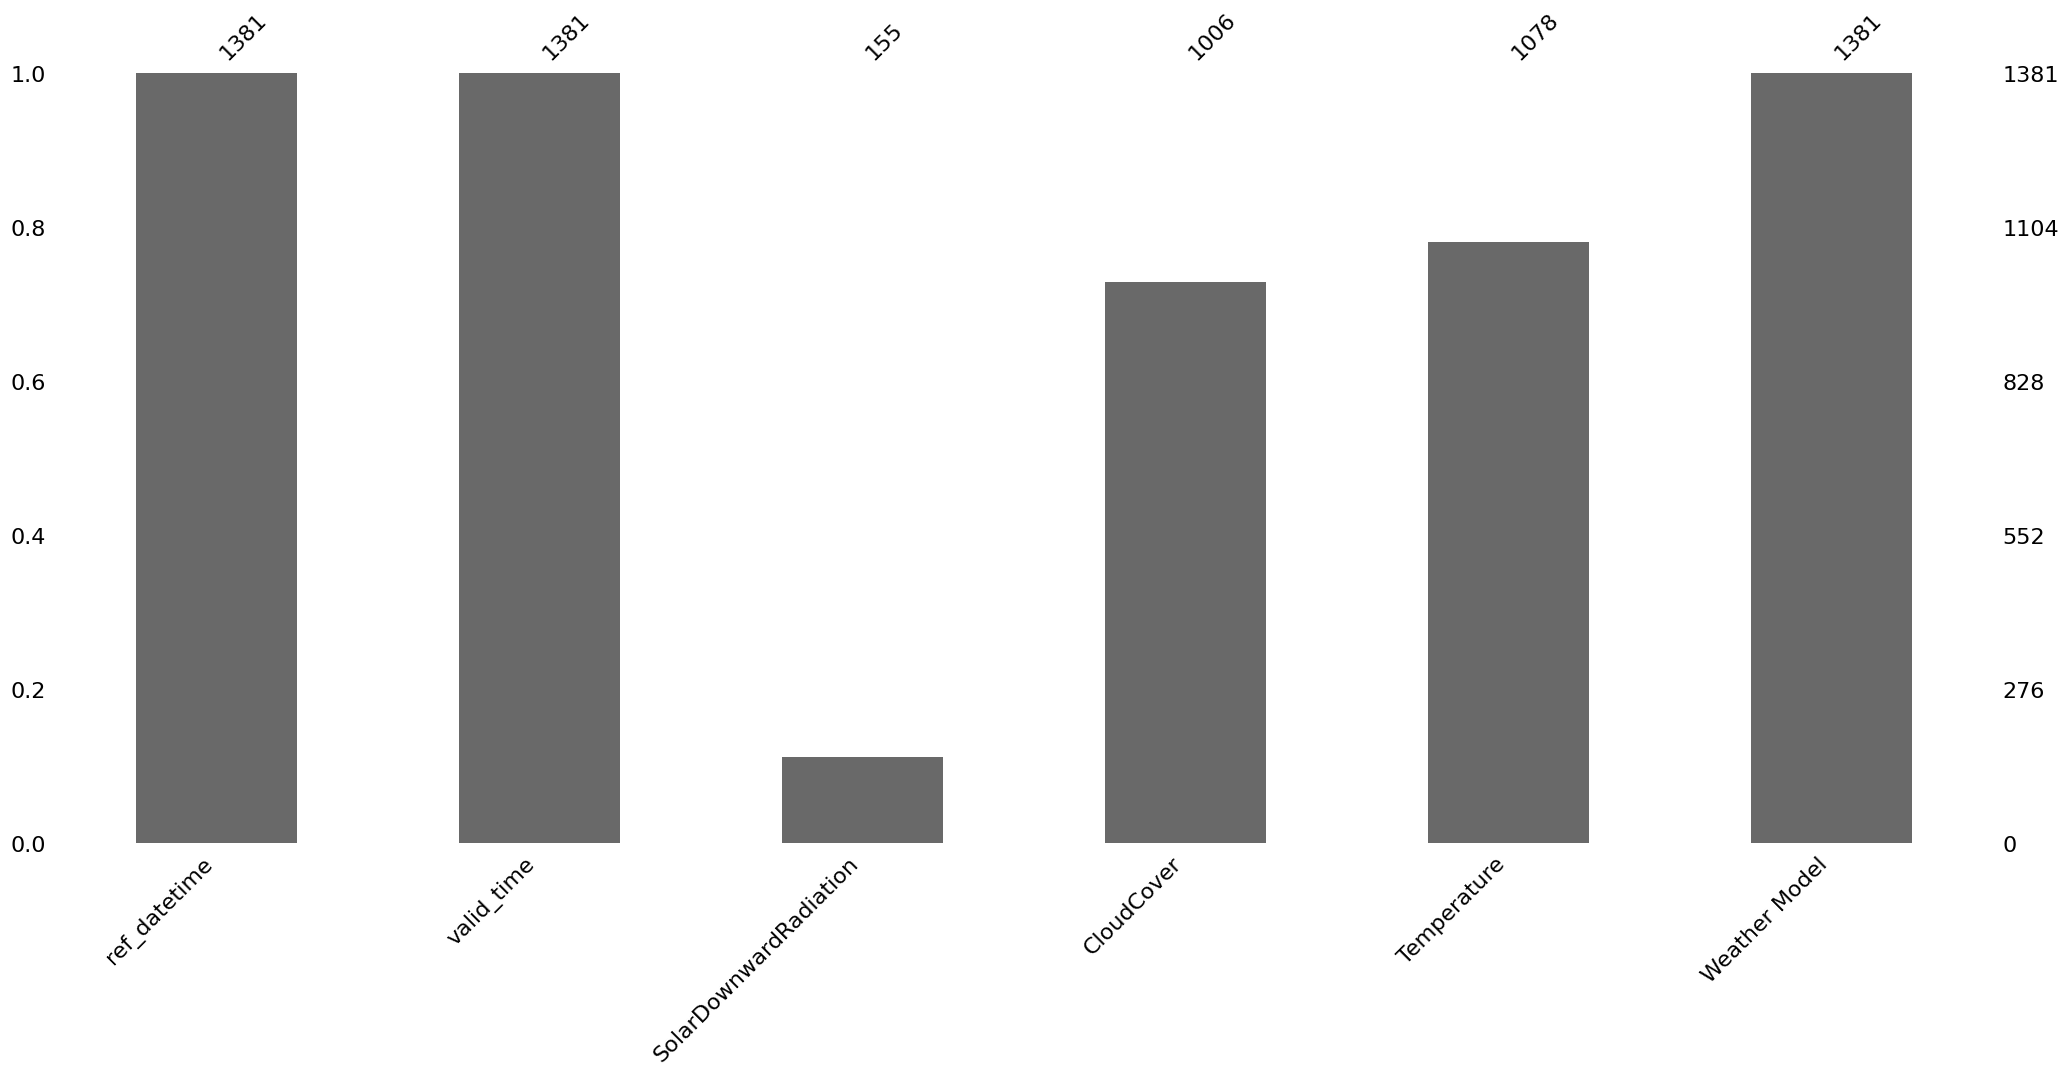

In [7]:
df1_mit_fehlenden_werten = df1[df1.isna().any(axis=1)]

msno.bar(df1_mit_fehlenden_werten)
plt.show()


In [8]:
# Zeilen mit mindestens einem fehlenden Wert filtern
df1_mit_fehlenden_werten = df1[df1.isna().any(axis=1)]

# Anzahl der Zeilen mit fehlenden Werten
anzahl_zeilen_mit_na = df1_mit_fehlenden_werten.shape[0]

# Ausgabe der Anzahl
print(f'Anzahl der Zeilen mit mindestens einem fehlenden Wert: {anzahl_zeilen_mit_na}')


Anzahl der Zeilen mit mindestens einem fehlenden Wert: 1381


# Aufgabe 2

# Aufgabe 2.1

Korrelationsmatrix:
                        Solar_capacity_mwp  Solar_MWh  SolarDownwardRadiation  \
Solar_capacity_mwp                1.000000   0.094170                0.091578   
Solar_MWh                         0.094170   1.000000                0.919376   
SolarDownwardRadiation            0.091578   0.919376                1.000000   
CloudCover                       -0.051735  -0.090328               -0.151793   
Temperature                       0.328800   0.423967                0.460832   
hour                              0.000757  -0.007869               -0.007970   

                        CloudCover  Temperature      hour  
Solar_capacity_mwp       -0.051735     0.328800  0.000757  
Solar_MWh                -0.090328     0.423967 -0.007869  
SolarDownwardRadiation   -0.151793     0.460832 -0.007970  
CloudCover                1.000000     0.076107 -0.014646  
Temperature               0.076107     1.000000  0.134108  
hour                     -0.014646     0.134108  1.0

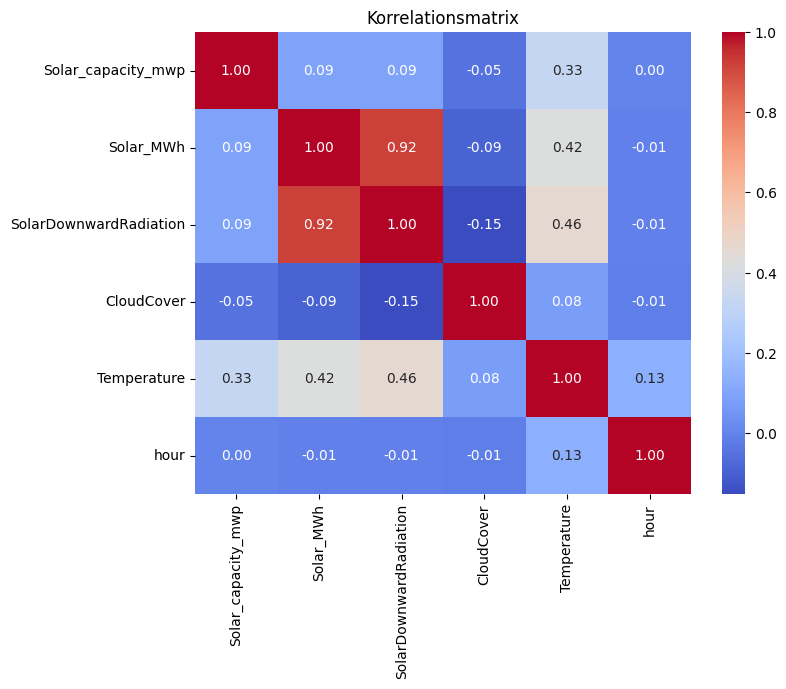

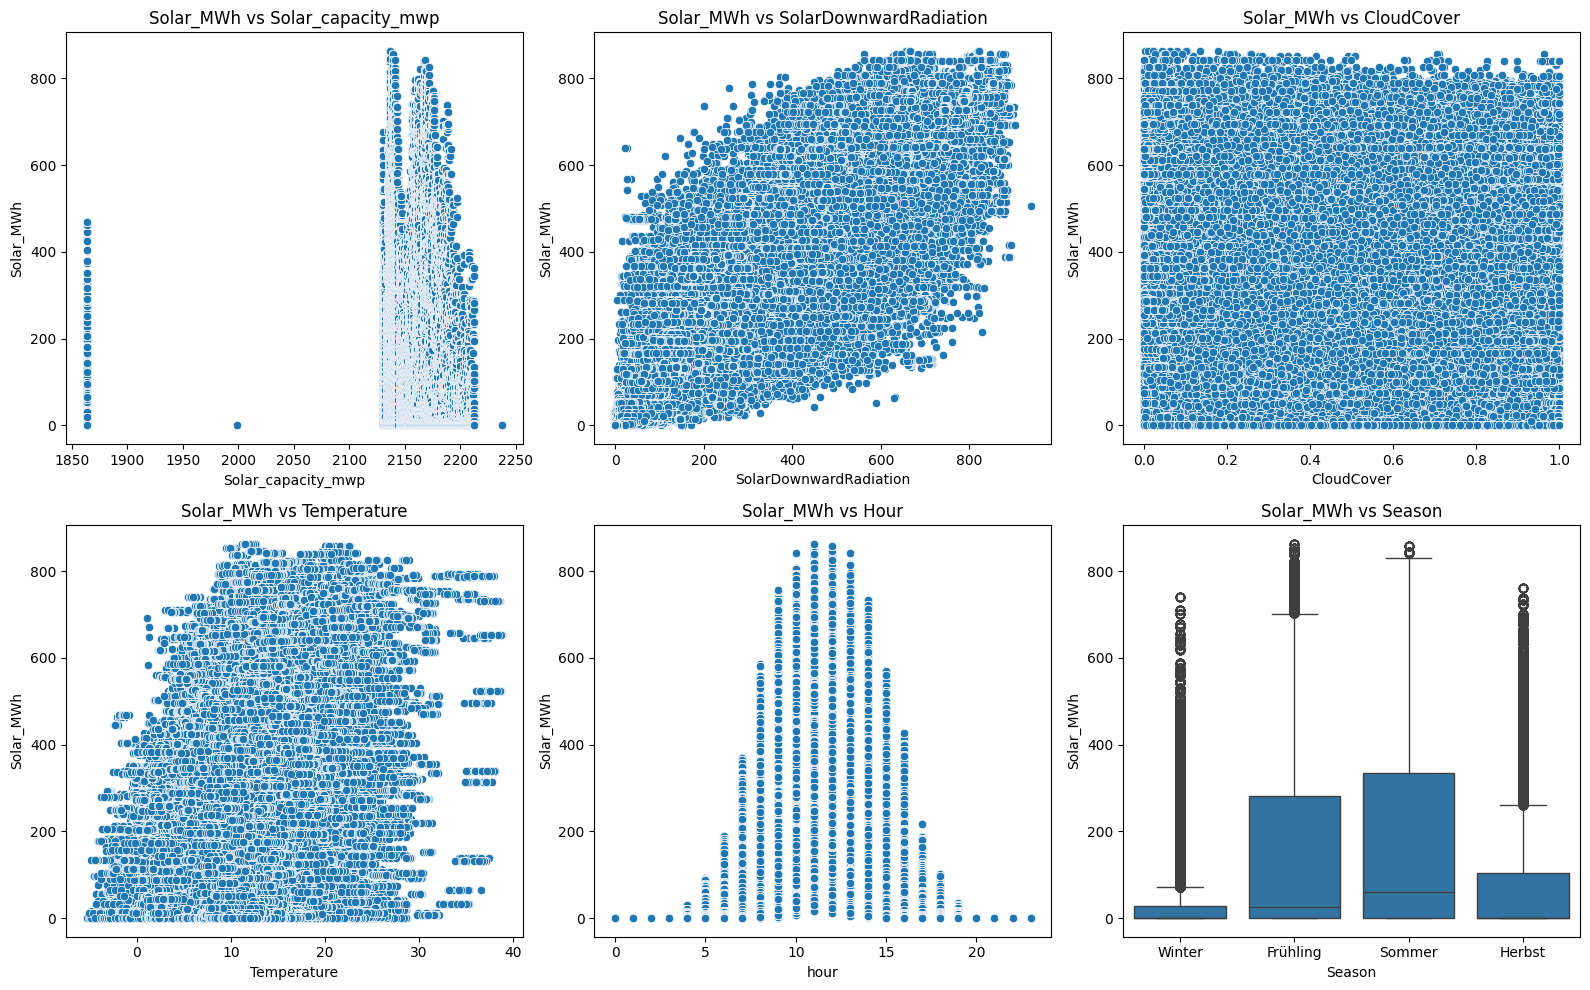

In [9]:
merged_df = merge_energy_and_forecast(df4, df1)

plot_attribute_vs_label_filtered(merged_df)
